# PreTrained VGG16

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image 
import skimage.io
import skimage.transform
from PIL import Image
import numpy as np
import copy
%matplotlib inline

In [0]:

import keras.backend as K
from keras_vggface.vggface import VGGFace
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Dropout, Activation, Lambda, Permute, Reshape
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D

In [0]:

model = VGGFace(model='vgg16', 
                weights='vggface',
                input_shape=(nrow,ncol,3)) 
model.summary()

Model: "vggface_vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)     

In [0]:
!wget http://www.robots.ox.ac.uk/~vgg/software/vgg_face/src/vgg_face_matconvnet.tar.gz

--2019-12-02 18:35:21--  http://www.robots.ox.ac.uk/~vgg/software/vgg_face/src/vgg_face_matconvnet.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1086906808 (1.0G) [application/x-gzip]
Saving to: ‘vgg_face_matconvnet.tar.gz’

vgg_face_matconvnet 100%[===================>]   1.01G  29.8MB/s    in 35s     

2019-12-02 18:35:57 (29.3 MB/s) - ‘vgg_face_matconvnet.tar.gz’ saved [1086906808/1086906808]



In [0]:
!tar xf vgg_face_matconvnet.tar.gz

In [0]:
%ls

cf.jpg                                        vgg_face_matconvnet/
justin-timberlake-getty-20074848-1280x0.jpeg  vgg_face_matconvnet.tar.gz
sample_data/


In [0]:
from scipy.io import loadmat

data = loadmat('vgg_face_matconvnet/data/vgg_face.mat', 
               matlab_compatible=False, 
               struct_as_record=False)

net = data['net'][0,0]
l = net.layers
description = net.classes[0,0].description
print(description)

[[array(['A.J._Buckley'], dtype='<U12')]
 [array(['A.R._Rahman'], dtype='<U11')]
 [array(['Aamir_Khan'], dtype='<U10')]
 ...
 [array(['Zsa_Zsa_Gabor'], dtype='<U13')]
 [array(['Zulay_Henao'], dtype='<U11')]
 [array(['Zuleyka_Silver'], dtype='<U14')]]


In [0]:
!wget https://images.complex.com/complex/image/upload/c_limit,dpr_auto,q_90,w_720/fl_lossy,pg_1/ga5bw4oxxu7a8mvgeoht.jpg

--2019-12-02 19:08:23--  https://images.complex.com/complex/image/upload/c_limit,dpr_auto,q_90,w_720/fl_lossy,pg_1/ga5bw4oxxu7a8mvgeoht.jpg
Resolving images.complex.com (images.complex.com)... 151.101.2.217, 151.101.66.217, 151.101.130.217, ...
Connecting to images.complex.com (images.complex.com)|151.101.2.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50854 (50K) [image/jpeg]
Saving to: ‘ga5bw4oxxu7a8mvgeoht.jpg’

ga5bw4oxxu7a8mvgeoh 100%[===================>]  49.66K  --.-KB/s    in 0.02s   

2019-12-02 19:08:23 (2.02 MB/s) - ‘ga5bw4oxxu7a8mvgeoht.jpg’ saved [50854/50854]



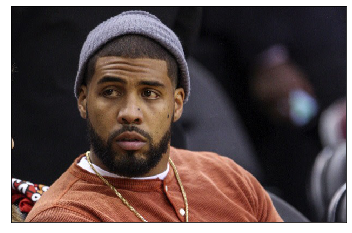

(400, 620, 3)

In [0]:
import cv2
imagePath = 'ga5bw4oxxu7a8mvgeoht.jpg'

img = cv2.imread('ga5bw4oxxu7a8mvgeoht.jpg', cv2.IMREAD_UNCHANGED)
image = Image.open(imagePath)
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()
dimensions = img.shape
dimensions

In [0]:
resized_image = cv2.resize(img, (224, 224),3) 

In [0]:
resized_image.shape

(224, 224, 3)

In [0]:
imarr = np.array(image).astype(np.float32)
imarr = np.expand_dims(resized_image, axis=0)
out = model.predict(imarr)

print(out.shape)
print(out)

(1, 2622)
[[2.5626810e-03 1.4080854e-04 1.9712269e-03 ... 1.4479291e-07
  8.6144784e-05 4.2100914e-04]]


In [0]:
max_index = np.argmax(out, axis=1)[0]
max_name = description[max_index,0]
print(max_index, max_name[0], out[0,max_index])

157 Arian_Foster 0.18878599
